In [ ]:
pip install cryptography

     |████████████████████████████████| 3.6 MB 10.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from cryptography.fernet import Fernet
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
class Encryptor():

    def key_create(self):
        key = Fernet.generate_key()
        return key

    def key_write(self, key, key_name):
        with open(key_name, 'wb') as mykey:
            mykey.write(key)

    def key_load(self, key_name):
        with open(key_name, 'rb') as mykey:
            key = mykey.read()
        return key


    def file_encrypt(self, key, original_file, encrypted_file):
        
        f = Fernet(key)

        with open(original_file, 'rb') as file:
            original = file.read()

        encrypted = f.encrypt(original)

        with open (encrypted_file, 'wb') as file:
            file.write(encrypted)

    def file_decrypt(self, key, encrypted_file, decrypted_file):
        
        f = Fernet(key)

        with open(encrypted_file, 'rb') as file:
            encrypted = file.read()

        decrypted = f.decrypt(encrypted)

        with open(decrypted_file, 'wb') as file:
            file.write(decrypted)


In [ ]:
encryptor=Encryptor()

mykey=encryptor.key_create()

encryptor.key_write(mykey, 'mykey.key')

loaded_key=encryptor.key_load('mykey.key')

encryptor.file_encrypt(loaded_key, 'creditcard1.csv', 'enc_creditcard2.csv')

encryptor.file_decrypt(loaded_key, 'enc_creditcard2.csv', 'dec_creditcard2.csv')

In [ ]:
credit_card_data = pd.read_csv('creditcard - Copy.csv') #loading dataset to pandas

In [ ]:
print(credit_card_data.columns.to_list())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8761,11926,0.224210,0.730182,0.536568,-0.297833,0.529837,0.008517,-0.153646,-0.778260,1.143360,-0.876834,1.191440,-2.575239,0.709439,1.530487,-0.702175,1.308524,-0.123651,0.935128,-0.478612,-0.365611,0.311157,-1.489044,-0.207238,-0.991151,0.504758,0.005972,0.092759,0.213102,1.99,0.0
8762,11928,-0.777982,1.247878,1.106014,1.421211,-0.087339,0.044765,0.039896,0.547840,0.752861,-0.454331,1.176714,-2.263816,0.465236,2.134358,-1.366341,-0.491886,0.945307,0.817865,1.292508,-0.006957,-0.144915,-0.084414,-0.150048,-0.063168,-0.039265,-0.283939,0.250660,0.110168,12.99,0.0
8763,11930,1.297487,-0.202241,0.043946,0.094497,-0.057158,0.099204,-0.280711,-0.127515,2.168290,-0.743718,-1.017521,-2.524102,1.766666,1.141467,-0.925722,0.020306,0.418826,0.028555,0.773782,-0.021500,-0.338119,-0.551489,-0.248950,-0.964184,0.592470,1.156197,-0.102371,-0.014854,39.98,0.0
8764,11932,-1.093189,0.157400,2.048652,-0.860421,0.235073,-0.167494,0.636240,-0.205278,1.507648,-1.005550,1.403830,-2.294793,0.614637,1.147110,-2.136801,0.023567,0.262536,0.316565,0.202758,-0.147977,-0.255789,-0.233994,-0.451409,0.018927,0.377757,0.958870,-0.297683,-0.246392,80.50,0.0
8765,11932,-2.594443,-0.991587,1.957468,1.705635,-0.182961,0.095771,-0.281082,0.642498,1.001348,-1.160703,0.437508,-1.653284,2.977296,1.326190,0.296322,-0.344473,1.022906,0.330445,-0.228393,1.085292,0.353258,0.501825,0.292150,0.060489,0.453079,-0.142001,0.183807,-0.143522,NaN,NaN


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8766 non-null   int64  
 1   V1      8766 non-null   float64
 2   V2      8766 non-null   float64
 3   V3      8766 non-null   float64
 4   V4      8766 non-null   float64
 5   V5      8766 non-null   float64
 6   V6      8766 non-null   float64
 7   V7      8766 non-null   float64
 8   V8      8766 non-null   float64
 9   V9      8766 non-null   float64
 10  V10     8766 non-null   float64
 11  V11     8766 non-null   float64
 12  V12     8766 non-null   float64
 13  V13     8766 non-null   float64
 14  V14     8766 non-null   float64
 15  V15     8766 non-null   float64
 16  V16     8766 non-null   float64
 17  V17     8766 non-null   float64
 18  V18     8766 non-null   float64
 19  V19     8766 non-null   float64
 20  V20     8766 non-null   float64
 21  V21     8766 non-null   float64
 22  

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
credit_card_data['V1'].value_counts() #distribution of legit transaction and fraudalant

 1.245674    77
 1.302378    60
 1.332849    45
 1.018412    40
 1.335053    39
             ..
 1.260489     1
-0.334428     1
-1.924143     1
 0.408080     1
-3.042118     1
Name: V1, Length: 140912, dtype: int64

In [ ]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1] #separating data for analysis

In [ ]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,6.754625,-8.948179,0.702725,-10.733854,-1.379520,-1.638960,-1.746350,0.776744,-1.327357,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,4.560720,-8.873748,-0.797484,-9.177166,-0.257025,-0.871688,1.313014,0.773914,-2.370599,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,6.439053,-7.520117,0.386352,-9.252307,-1.365188,-0.502362,0.784427,1.494305,-1.808012,0.388307,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,5.588724,-7.148243,1.680451,-6.210258,0.495282,-3.599540,-4.830324,-0.649090,2.250123,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


In [ ]:
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760,11925,1.276021,-0.092841,0.512168,0.319980,-0.548912,-0.516026,-0.297637,-0.185306,2.110216,-0.730616,-0.097144,-2.215460,1.513681,1.211123,-0.998930,-0.284457,0.800859,-0.309446,0.390055,-0.114952,-0.286629,-0.349731,-0.096298,0.062000,0.460812,1.095338,-0.096243,-0.009260,13.00,0.0
8761,11926,0.224210,0.730182,0.536568,-0.297833,0.529837,0.008517,-0.153646,-0.778260,1.143360,-0.876834,1.191440,-2.575239,0.709439,1.530487,-0.702175,1.308524,-0.123651,0.935128,-0.478612,-0.365611,0.311157,-1.489044,-0.207238,-0.991151,0.504758,0.005972,0.092759,0.213102,1.99,0.0
8762,11928,-0.777982,1.247878,1.106014,1.421211,-0.087339,0.044765,0.039896,0.547840,0.752861,-0.454331,1.176714,-2.263816,0.465236,2.134358,-1.366341,-0.491886,0.945307,0.817865,1.292508,-0.006957,-0.144915,-0.084414,-0.150048,-0.063168,-0.039265,-0.283939,0.250660,0.110168,12.99,0.0
8763,11930,1.297487,-0.202241,0.043946,0.094497,-0.057158,0.099204,-0.280711,-0.127515,2.168290,-0.743718,-1.017521,-2.524102,1.766666,1.141467,-0.925722,0.020306,0.418826,0.028555,0.773782,-0.021500,-0.338119,-0.551489,-0.248950,-0.964184,0.592470,1.156197,-0.102371,-0.014854,39.98,0.0


In [ ]:
len(fraud)

367

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


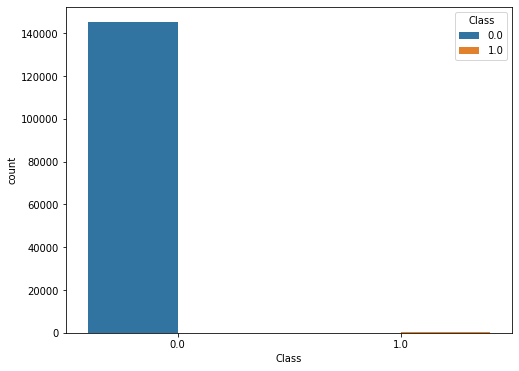

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(credit_card_data['Class'],hue=credit_card_data['Class'])

In [ ]:
print(legit.shape)
print(fraud.shape)

(145207, 31)
(281, 31)


In [ ]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0


In [ ]:
legit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
legit.Amount.describe() #statistical measure of data

count    8735.000000
mean       63.703021
std       189.290575
min         0.000000
25%         5.000000
50%        15.950000
75%        52.520000
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      30.000000
mean       88.757000
std       341.372542
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
credit_card_data.groupby('Class').mean() #comparing values for both transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,53126.105312,-0.241819,0.018864,0.680321,0.127982,-0.270357,0.080377,-0.105288,0.062235,-0.084151,-0.011132,0.197144,0.048246,-0.018794,0.040004,0.228479,-0.000916,0.054902,-0.077678,-0.018655,0.041949,-0.041657,-0.116963,-0.032155,0.012093,0.129309,0.021585,-0.000311,0.002266,90.226338
1.0,44999.096085,-5.465468,3.861708,-7.046893,4.490812,-3.911473,-1.472576,-5.864314,1.503920,-2.645690,-5.763357,4.141149,-6.426926,-0.114669,-7.286006,0.194638,-4.515051,-7.562526,-2.683293,0.767892,0.276140,1.226139,-0.299422,-0.114417,-0.120458,0.212352,0.082528,0.526287,0.087996,118.288648


In [ ]:
legit_sample = legit.sample(n=213)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0) #put values below

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1290,1000,1.083405,0.034321,0.472301,1.346392,-0.310584,0.003423,-0.098663,0.186340,0.203682,0.074689,1.132443,0.626088,-1.489603,0.524115,-0.671652,-0.526160,0.157898,-0.394419,-0.150180,-0.240701,-0.043733,-0.014473,-0.045020,0.211587,0.559625,-0.339989,0.025942,0.007354,20.43,0.0
8432,11308,-0.587910,1.597550,1.506872,1.931827,0.255396,0.176666,0.105665,0.428292,-0.023590,-0.372267,-0.544707,-2.786530,2.216844,1.692183,-0.277267,1.147777,-0.125004,0.375937,-0.754553,-0.202470,-0.300250,-0.840780,-0.041578,-0.573062,-0.136691,-0.283463,-0.117924,-0.038322,1.00,0.0
1294,1004,-0.556704,0.239968,0.754325,-1.024342,0.617849,0.560902,0.161715,0.111242,-1.790760,0.492548,1.042804,-0.008772,0.831598,-0.022110,1.512106,-1.069230,1.905180,-3.510029,-0.228956,0.030810,0.493641,1.495781,-0.061486,-0.563574,-0.537784,-0.016190,-0.060091,0.181052,10.00,0.0
1498,1165,1.092299,-0.003639,0.337475,1.435442,-0.298523,-0.197387,0.029905,0.048449,0.481552,-0.104114,-0.755587,-0.153879,-1.412548,0.330483,0.052020,-0.657837,0.338299,-0.812590,-0.370838,-0.197363,-0.094188,-0.181422,-0.079131,0.061501,0.606045,-0.312443,0.024461,0.019722,45.42,0.0
6827,8628,0.805512,0.606154,0.402230,1.675162,0.096972,-0.120734,0.270709,-0.088880,1.432570,-0.369861,0.421862,-1.761650,2.206609,1.241335,-0.908587,-0.974665,1.072478,-0.600338,-0.121352,-0.158865,-0.122455,0.180806,0.283062,0.020002,-0.705276,-0.477861,-0.014347,-0.132148,23.24,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8296,11080,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,-12.840934,12.018913,-17.769143,-0.431036,-19.214325,-0.962465,-10.266609,-15.503392,-5.494928,-0.410481,1.493775,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1.0,1.0
8312,11092,0.378275,3.914797,-5.726872,6.094141,1.698875,-2.807314,-0.591118,-0.123496,-2.530713,-5.153095,4.654088,-7.839539,1.371819,-9.634690,-0.739597,-0.663204,0.891935,0.978676,-2.005477,0.440439,0.149896,-0.601967,-0.613724,-0.403114,1.568445,0.521884,0.527938,0.411910,1.0,1.0
8335,11131,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,-11.420451,10.853012,-15.969208,0.546690,-14.690729,0.912337,-12.227189,-18.587366,-6.920762,3.166999,1.410678,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1.0,1.0
8615,11629,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,-13.193415,11.619723,-17.631606,-0.355194,-18.822087,-1.283129,-10.031097,-15.227008,-5.322009,-0.501751,1.382619,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1.0,1.0
8617,11635,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,-2.203224,-4.137840,4.570113,-7.629170,1.733917,-9.440375,-0.023353,-1.233958,1.632009,1.315735,-0.287189,0.535435,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851,1.0,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


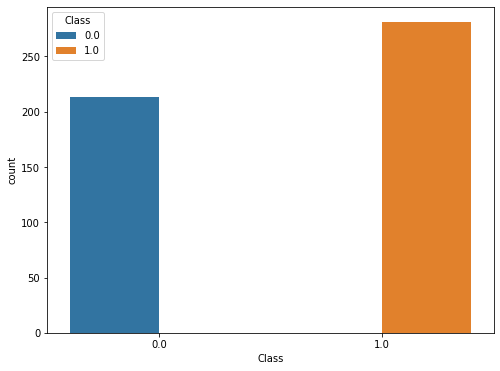

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(new_dataset['Class'],hue=new_dataset['Class'])

In [ ]:
new_dataset['Class'].value_counts()

1.0    281
0.0    213
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,54856.680751,-0.527277,0.092880,0.652709,0.060617,-0.338671,0.037661,-0.157287,-0.012856,-0.154335,0.012612,0.172546,0.113796,-0.002415,0.079066,0.269869,0.050637,0.091523,-0.153268,0.054754,0.069733,-0.028422,0.014176,-0.080695,0.020313,0.110867,-0.050306,-0.032043,0.013745,108.574507
1.0,44999.096085,-5.465468,3.861708,-7.046893,4.490812,-3.911473,-1.472576,-5.864314,1.503920,-2.645690,-5.763357,4.141149,-6.426926,-0.114669,-7.286006,0.194638,-4.515051,-7.562526,-2.683293,0.767892,0.276140,1.226139,-0.299422,-0.114417,-0.120458,0.212352,0.082528,0.526287,0.087996,118.288648


In [ ]:
X = new_dataset.drop(columns='Class', axis=1) #dropping column 1-> features
Y = new_dataset['Class'] #storing in y-> labels

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify= Y, random_state=2) #data 

In [ ]:
print(X.shape,X_train.shape, X_test.shape)

(494, 30) (395, 30) (99, 30)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train) #training logistical regression model with training data

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train) #evaluating
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) #accuracy on training data

In [ ]:
print('Accuracy on training data : ',training_data_accuracy)

Accuracy on training data :  0.9493670886075949


In [ ]:
X_test_prediction =  model.predict(X_test) #accuracy on test data
test_data_accuracy =  accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('accuracy score on test data : ', test_data_accuracy)

accuracy score on test data :  0.9393939393939394
